In [1]:
from variations import *
import variations
reload(variations)

<module 'variations' from 'variations.pyc'>

In [2]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

Welcome to ROOTaaS 6.06/06
purities:
[ 0.2624743   0.51547468  0.509     ]
[ 0.04136153  0.048       0.048     ]
[0.0, 0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069]
['../InputData/pT_Rebin_3/pp_SE_L0_Correlation_GMB_Ratio.root', '../InputData/pT_Rebin_3/pPb_SE_L0_Correlation_GMB_Ratio.root']
purities:
[ 0.2624743   0.51547468  0.509     ]
[ 0.04136153  0.048       0.048     ]
[0.0, 0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069]
['../InputData/pT_Rebin_3/pp_SE_L0_Correlation_GMB_Ratio.root', '../InputData/pT_Rebin_3/pPb_SE_L0_Correlation_GMB_Ratio.root']


In [3]:
Ldphi = [0.39269908169872414, 0.5890486225480862, 0.7853981633974483, 0.9817477042468103, 1.1780972450961724, 1.3744467859455345, 1.5707963267948966, 1.7671458676442586, 1.9634954084936207, 2.1598449493429825, 2.356194490192345, 2.552544031041707, 2.748893571891069, 2.945243112740431]
print(Ldphi[6:])
print(len(Ldphi))

[1.5707963267948966, 1.7671458676442586, 1.9634954084936207, 2.1598449493429825, 2.356194490192345, 2.552544031041707, 2.748893571891069, 2.945243112740431]
14


In [4]:
sdphi = [0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069]
print(sdphi[3:])

[1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069]


In [5]:
Corrs = ROOT_to_nparray()
print(len(Corrs["p-Pb_CSR"][2][2]))

7


In [6]:
Show_Plots = False
if (Ped_Sub_First):
    if (Show_Plots):
        Plot_UB()
        Plot_Sub_UB_Overlay(Corrs)
    Correlated_Subtraction(Corrs)
    
else:
    Correlated_Subtraction(Corrs)
    if (Show_Plots):
        Plot_UB_Subtraction(Corrs)
    Ped_Sub_After_Cs(Corrs)

$C_S = \frac{C_{SR} - (1-p) C_{BR}}{p}$

In [7]:
#Plot_pp_pPb_Cs(Corrs)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

In [8]:
Frags = Get_Fragmentation(Corrs)

## p-Pb / pp

In [9]:
reload(functions_fragmentation)
from functions_fragmentation import *
print(Frags["pp_FF"][2])

[ 4.68375939  2.25961039  1.35388829  0.27323371 -0.08608628  0.01266965
         nan]


**Weigthed Average:** $\frac{\sum_{i=1}^{n}w_i x_i}{\sum_{i=1}^{n}w_i}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [10]:
Combined_Frags = Average_FF(Frags)

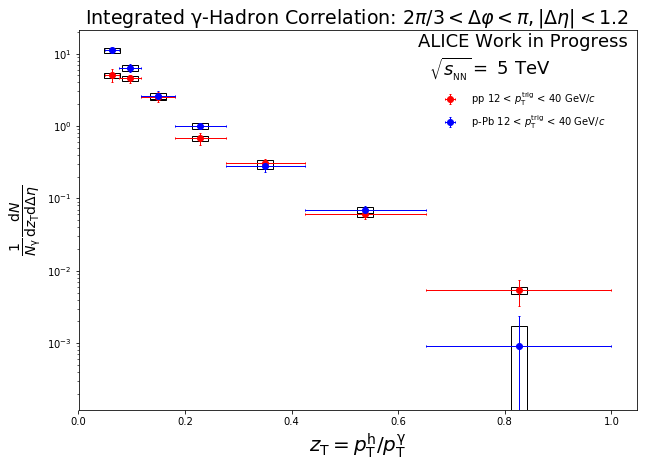

                    pp Central Values:
[ 5.06011473  4.52369736  2.52852092  0.6745162   0.30892356  0.06062511
  0.00536629]

                    pp Stat. Uncertainty:
[ 1.06019706  0.57560369  0.39400225  0.12961589  0.03556728  0.00827185
  0.00210011]

                    p-Pb Central Values:
[  1.10448259e+01   6.31659164e+00   2.63115072e+00   9.95992032e-01
   2.80616881e-01   6.97152495e-02   9.17559084e-04]

                    p-Pb Stat. Uncertainty:
[ 0.99477431  0.83359753  0.36160852  0.09526858  0.05066386  0.00774234
  0.00143262]

                        LaTeX Table
Source   &  pp data & \pPb~data  \\
Statistical Uncertainty & 12\%-39\% & 9\%-156\% \\
\hline
Purity & 6\%-9\% & 6\%-87\% \\
Tracking Efficiency &  5\% & 5\%  \\ 


In [11]:
Plot_pp_pPb_Avg_FF(Combined_Frags)

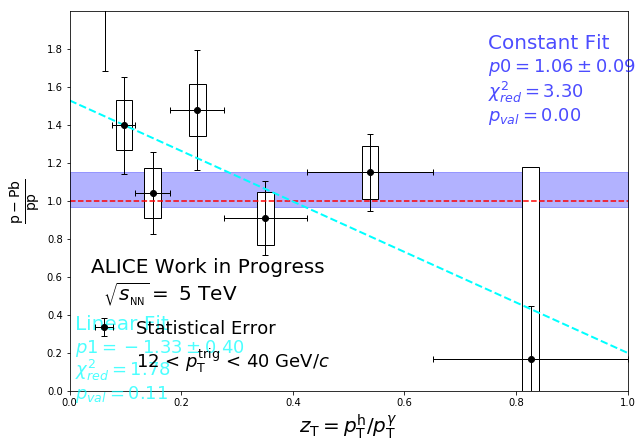

                Central Values:
[ 2.18272243  1.39633383  1.04058887  1.47660208  0.90836995  1.1499401
  0.17098576]

                Ratio Uncertainty from Purity:
[ 0.07035736  0.08680968  0.10721189  0.09005926  0.1236557   0.11111305
  1.00800394]

                Ratio Uncertainty from Single Track Efficiency:
[ 0.15434178  0.09873571  0.07358074  0.10441153  0.06423145  0.08131304
  0.01209052]

                Full Systematic Uncertainty:
[ 0.16962177  0.13147114  0.13003275  0.1378856   0.13934278  0.13768777
  1.00807644]

****************************************
Minimizer is Linear
Chi2                      =      19.7879
NDf                       =            6
p0                        =      1.05868   +/-   0.093368    

****************************************
Minimizer is Linear
Chi2                      =      8.91929
NDf                       =            5
p0                        =      1.52763   +/-   0.17015     
p1                        =     -1.32696   +/-   0

In [12]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

## Compare Trigger pT Bins

In [13]:
reload(functions_correlations)
from functions_correlations import *

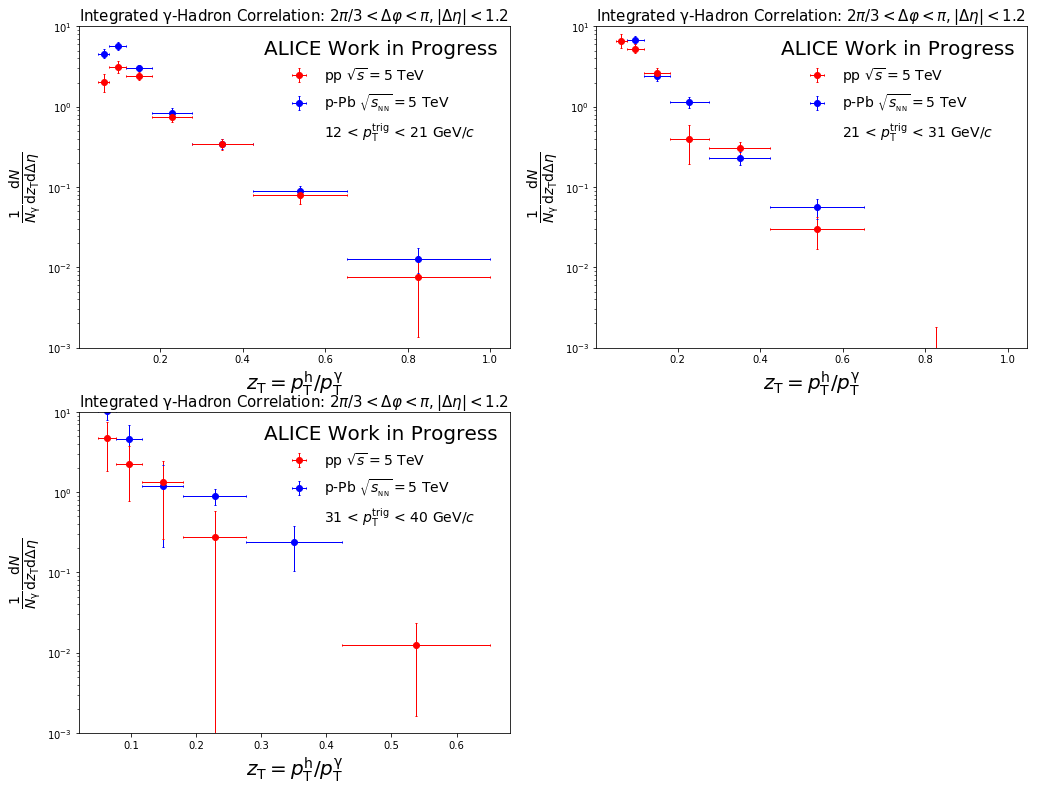

In [14]:
Plot_FF(Frags)

In [15]:
reload(functions_fragmentation)
from functions_fragmentation import *

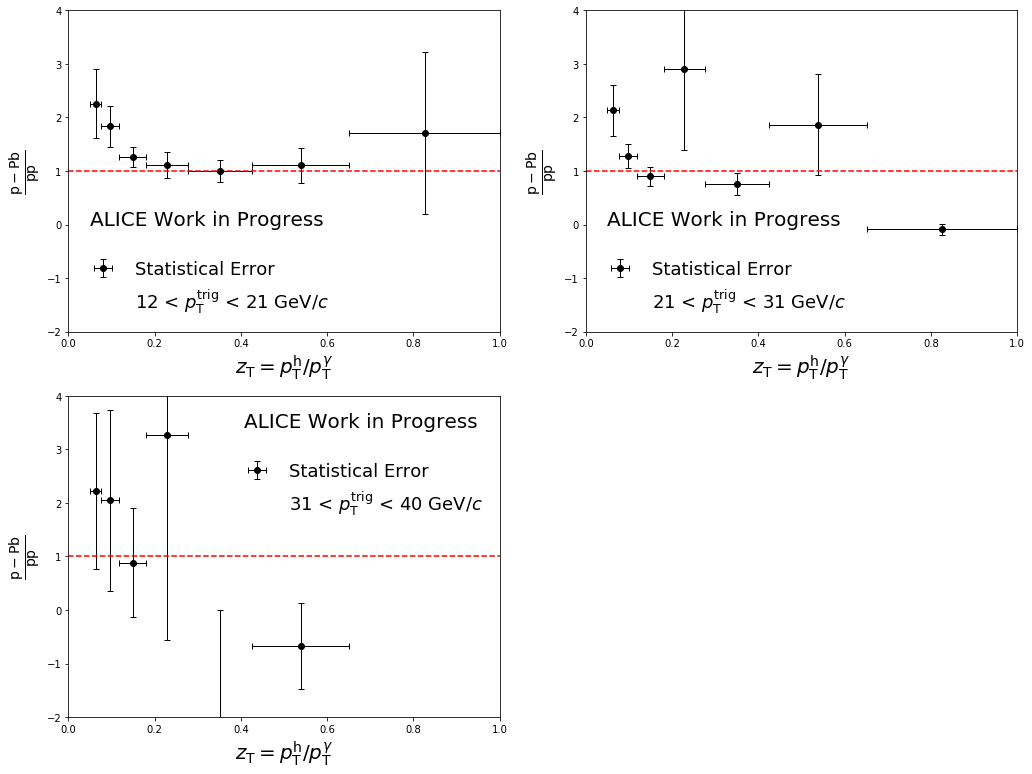

In [16]:
FF_Ratio(Frags)

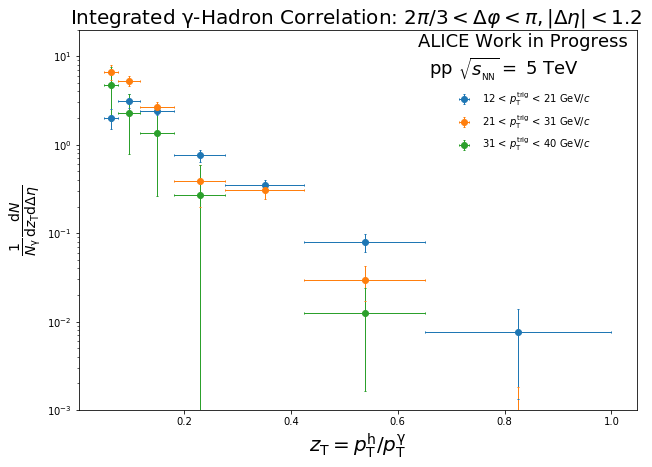

                             PROTON-PROTON:
Central Values
[[  2.02682024e+00   3.14795247e+00   2.41826816e+00   7.55165910e-01
    3.45905781e-01   7.98901497e-02   7.56373631e-03]
 [  6.66521033e+00   5.29347163e+00   2.65778677e+00   3.91990924e-01
    3.06176603e-01   2.98161431e-02   8.18840983e-04]
 [  4.68375939e+00   2.25961039e+00   1.35388829e+00   2.73233705e-01
   -8.60862777e-02   1.26696531e-02              nan]]
Statistical Errors (Relative)
[[ 0.25307772  0.17350125  0.11060936  0.15583816  0.15433503  0.22863165
   0.82263017]
 [ 0.19617557  0.13083054  0.13861542  0.50150248  0.19535913  0.42528436
   1.20818454]
 [ 0.60926637  0.65700269  0.80568691  1.1498497  -0.81789661  0.86963122
          nan]]
Relative Uncertainty from Purity
[[  3.76275703e-01   5.84411981e-01   4.48947339e-01   1.40195257e-01
    6.42168154e-02   1.48314694e-02   1.40419468e-03]
 [  7.31187737e-01   5.80705086e-01   2.91564856e-01   4.30022373e-02
    3.35882239e-02   3.27089425e-03   8.982

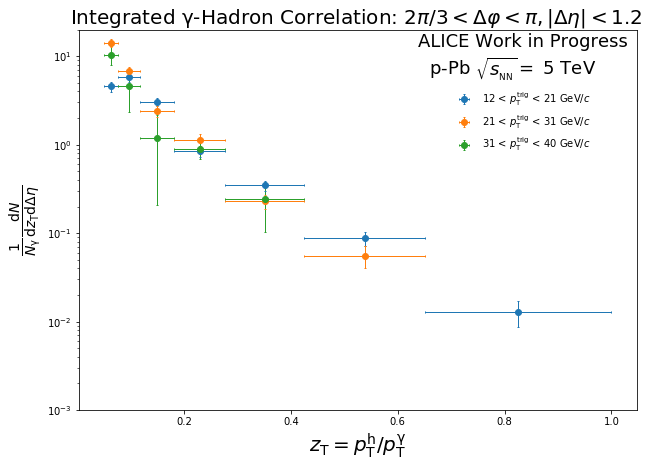

                              PROTON-LEAD:
Central Values
[[  4.57544269e+00   5.77519738e+00   3.04738193e+00   8.42655366e-01
    3.45894249e-01   8.83897501e-02   1.28817163e-02]
 [  1.42195822e+01   6.76370968e+00   2.39899118e+00   1.14141372e+00
    2.31131558e-01   5.56122272e-02  -7.01083956e-05]
 [  1.03918625e+01   4.62709580e+00   1.19630737e+00   8.92656546e-01
    2.42673020e-01  -8.54986589e-03              nan]]
Statistical Errors (Relative)
[[ 0.12814657  0.10980574  0.09836897  0.14686732  0.1365861   0.18104072
   0.33364035]
 [ 0.10603523  0.11215469  0.13967144  0.14452465  0.17969857  0.27614582
  -0.        ]
 [ 0.24132253  0.49643134  0.82526934  0.22167443  0.57016249 -0.80682636
          nan]]
Relative Uncertainty from Purity
[[  8.49423093e-01   1.07215549e+00   5.65741232e-01   1.56437524e-01
    6.42146745e-02   1.64094056e-02   2.39146854e-03]
 [  1.55991838e+00   7.41993325e-01   2.63174430e-01   1.25215510e-01
    2.53556230e-02   6.10077950e-03  -7.6910

In [17]:
Overlay_pT_FF(Frags)

## Compare Track Cuts

In [18]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

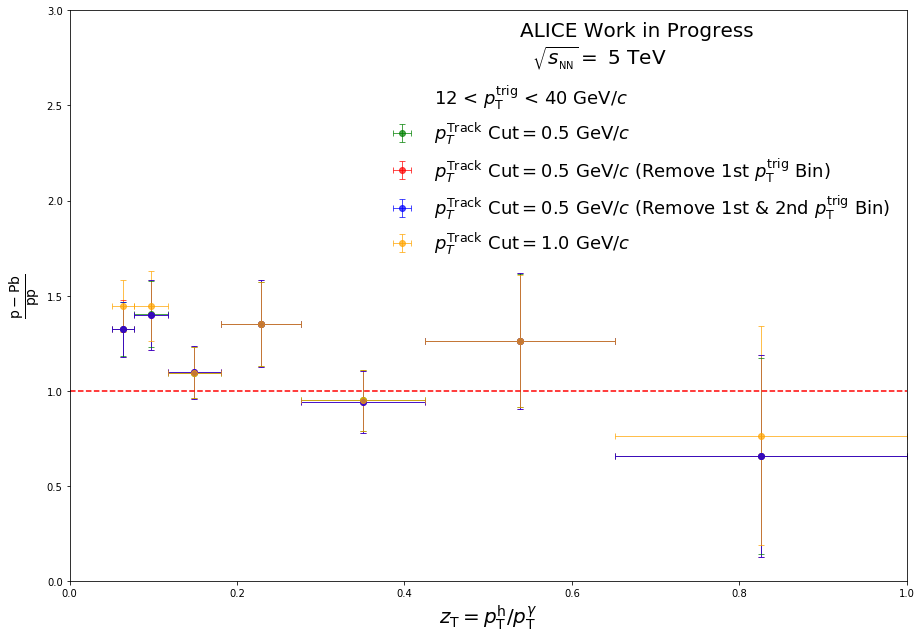

                Central Values:
[ 1.4457051   1.4481745   1.09574319  1.3500227   0.94988511  1.26222862
  0.76439433]

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   

****************************************
Minimizer is Linear
Chi2                      =      6.55659
NDf                       =            6
p0                        =      1.18867   +/-   0.0714348   

****************************************
Minimizer is Linear
Chi2                      =      6.59049
NDf                       =            6
p0                        =      1.19041   +/-   0.070857    

****************************************
Minimizer is Linear
Chi2                      =      9.02064
NDf                       =            6
p0                        =      1.23515   +/-   0.0685692   


In [19]:
strings = ["05zT","05zT_3bins","05zT_2bins","1zT"]
string_descriptions = ["$p_{T}^\mathrm{Track}\ \mathrm{Cut} = 0.5\ \mathrm{GeV}/c$",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st & 2nd $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 1.0\ \mathrm{GeV}/c$"]
colors = ["green","red","blue","orange"]
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

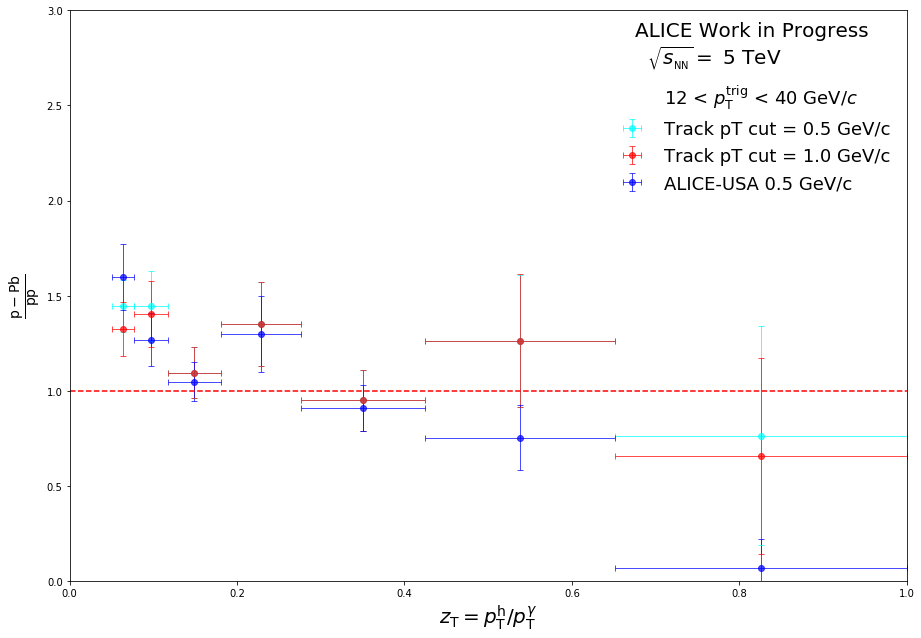

                Central Values:
[ 1.5979682   1.26981434  1.04878313  1.29933689  0.91089677  0.75447711
  0.07122347]

****************************************
Minimizer is Linear
Chi2                      =      9.02064
NDf                       =            6
p0                        =      1.23515   +/-   0.0685692   

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   

****************************************
Minimizer is Linear
Chi2                      =      58.2675
NDf                       =            6
p0                        =     0.975847   +/-   0.0534109   


In [20]:
strings = ["1zT","05zT","05zT_working_old"]
string_descriptions = ["Track pT cut = 0.5 GeV/c", "Track pT cut = 1.0 GeV/c","ALICE-USA 0.5 GeV/c"]
colors = ["cyan","red","blue"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

## Compare Trigger Photon pT Binning (3,4,& 5 Bins)

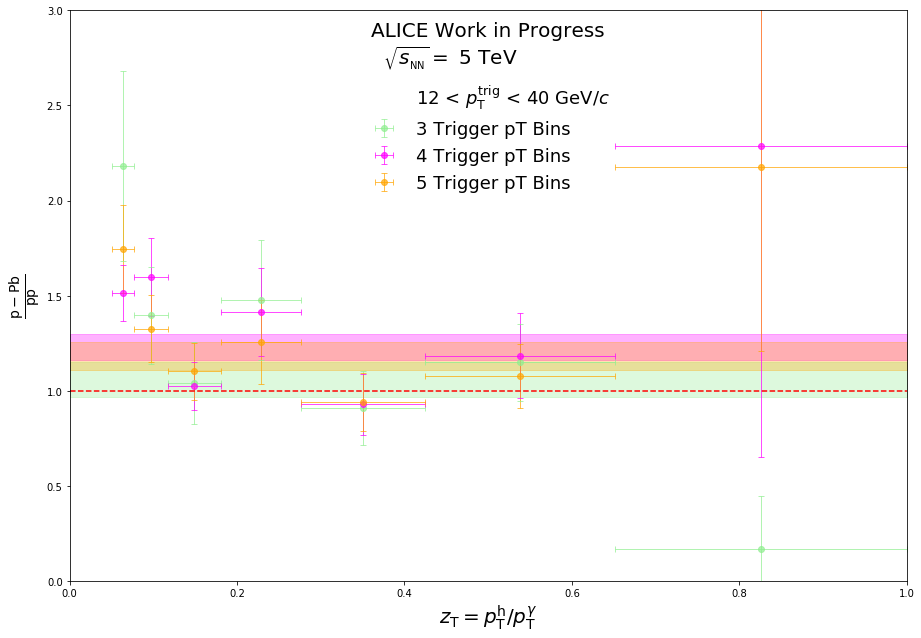

                Central Values:
[ 1.74759929  1.32684886  1.10166038  1.25803898  0.94240937  1.07806614
  2.1777261 ]

****************************************
Minimizer is Linear
Chi2                      =      19.7879
NDf                       =            6
p0                        =      1.05868   +/-   0.093368    

****************************************
Minimizer is Linear
Chi2                      =      14.1856
NDf                       =            6
p0                        =      1.23139   +/-   0.0688764   

****************************************
Minimizer is Linear
Chi2                      =      10.9787
NDf                       =            6
p0                        =      1.18319   +/-   0.0716699   


In [28]:
strings = ["pT_Rebin_3","pT_Rebin_4","pT_Rebin_5"]
string_descriptions = ["3 Trigger pT Bins", "4 Trigger pT Bins","5 Trigger pT Bins"]
colors = ["lightgreen","magenta","orange"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

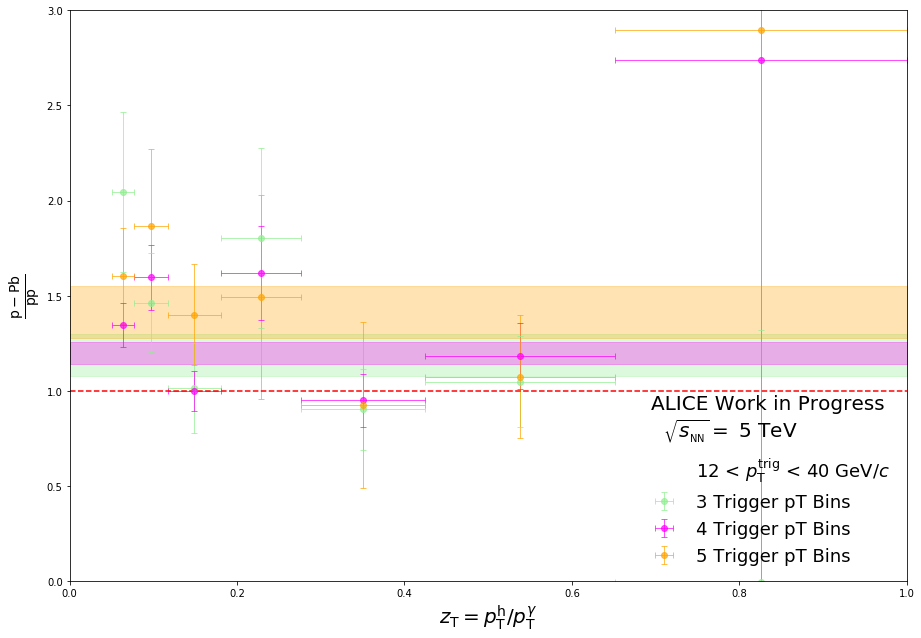

                Central Values:
[ 1.60368295  1.86557271  1.40054509  1.49282524  0.92696167  1.07433435
  2.89808321]

****************************************
Minimizer is Linear
Chi2                      =       9.6993
NDf                       =            5
p0                        =      1.18761   +/-   0.110241    

****************************************
Minimizer is Linear
Chi2                      =      16.7771
NDf                       =            6
p0                        =      1.19896   +/-   0.0575572   

****************************************
Minimizer is Linear
Chi2                      =      4.29334
NDf                       =            6
p0                        =      1.41525   +/-   0.135751    


In [22]:
strings = ["pT_Rebin_3_Cut","pT_Rebin_4_Cut","pT_Rebin_5_Cut"]
string_descriptions = ["3 Trigger pT Bins", "4 Trigger pT Bins","5 Trigger pT Bins"]
colors = ["lightgreen","magenta","orange"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

## Compare ZT Binning (6,7, & 8)

In [23]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


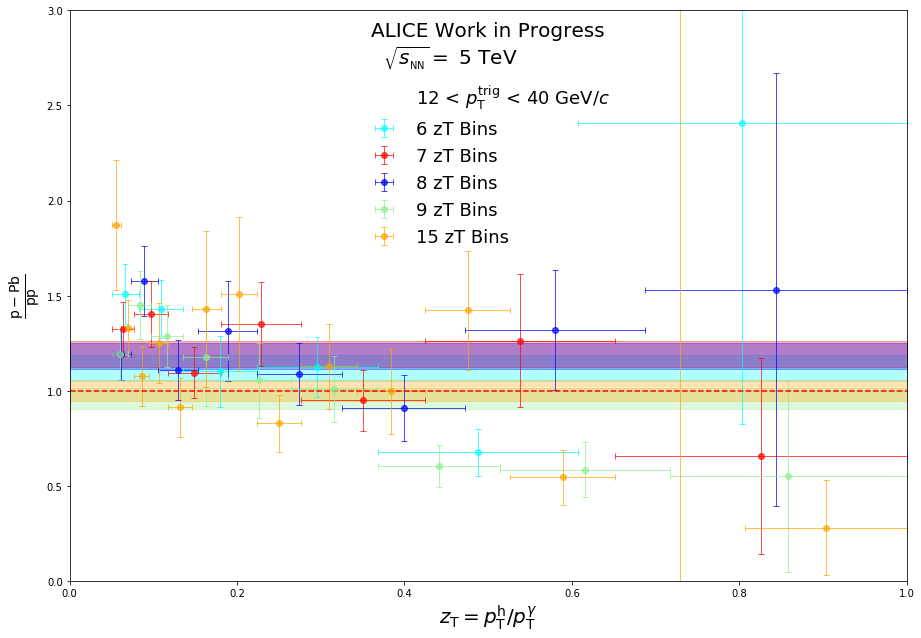

                Central Values:
[ 1.87060069  1.33279792  1.07594827  1.25077422  0.91343145  1.42914142
  1.50908939  0.82971572  1.12926386  0.9983693   1.42230144  0.54562724
  8.00428232  0.28118115]

****************************************
Minimizer is Linear
Chi2                      =      23.6267
NDf                       =            5
p0                        =      1.12038   +/-   0.0677459   

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   

****************************************
Minimizer is Linear
Chi2                      =      8.12662
NDf                       =            7
p0                        =      1.18291   +/-   0.0673123   

****************************************
Minimizer is Linear
Chi2                      =       33.127
NDf                       =            8
p0                        =     0.

In [24]:
strings = ["zT_Rebin_6","05zT","zT_Rebin_8","zT_Rebin_9","zT_Rebin_15"]
string_descriptions = ["6 zT Bins", "7 zT Bins", "8 zT Bins","9 zT Bins","15 zT Bins"]
colors = ["cyan","red","blue","lightgreen","orange"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


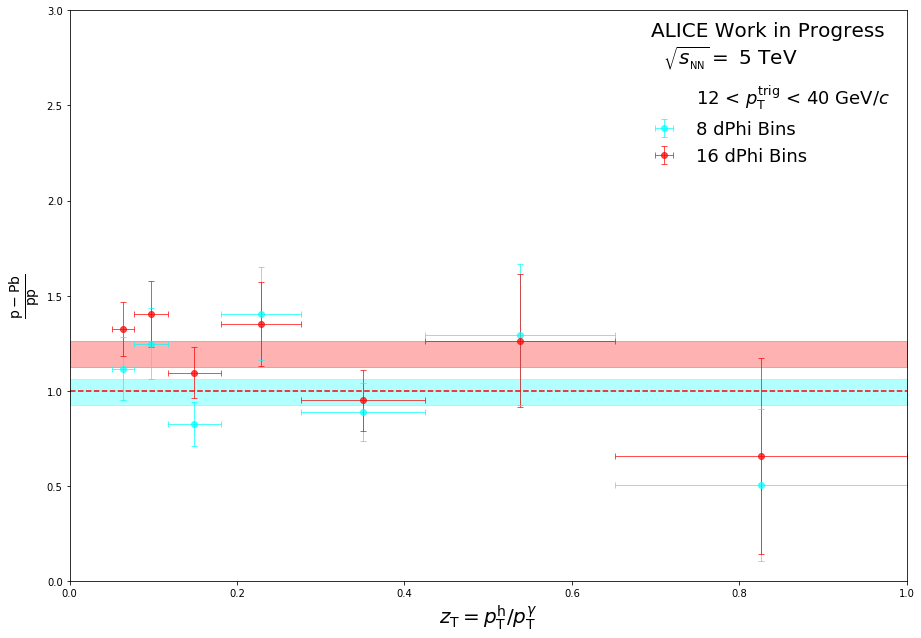

                Central Values:
[ 1.32366377  1.40359966  1.09574319  1.35002169  0.94964235  1.26255443
  0.65928593]

****************************************
Minimizer is Linear
Chi2                      =      10.0649
NDf                       =            6
p0                        =     0.994347   +/-   0.0679332   

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   


In [25]:
strings = ["dPhi_Rebin_16","05zT"]
string_descriptions = ["8 dPhi Bins", "16 dPhi Bins"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


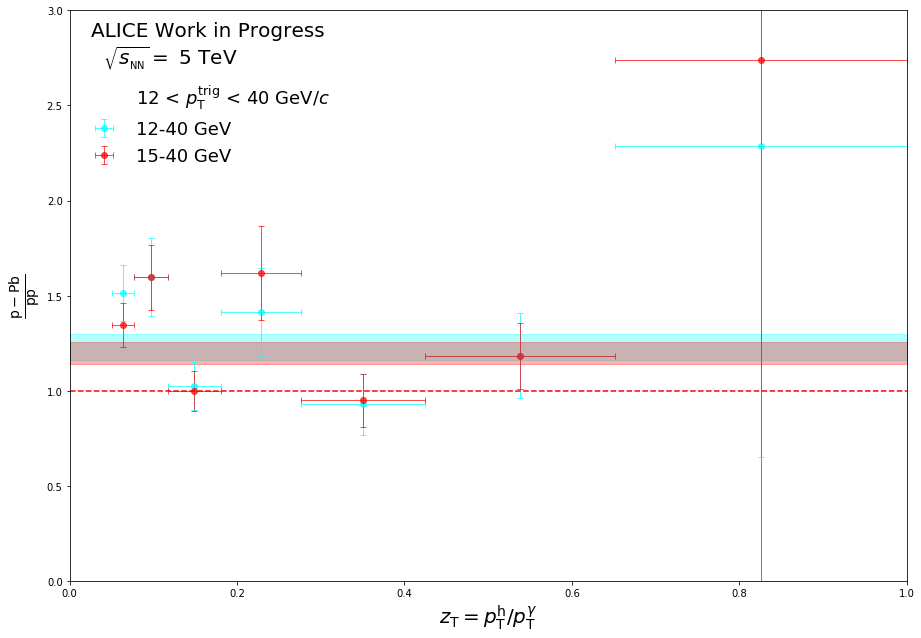

                Central Values:
[ 1.34555207  1.59583687  0.99905319  1.61926902  0.94942324  1.18174526
  2.73688196]

****************************************
Minimizer is Linear
Chi2                      =      14.1856
NDf                       =            6
p0                        =      1.23139   +/-   0.0688764   

****************************************
Minimizer is Linear
Chi2                      =      16.7771
NDf                       =            6
p0                        =      1.19896   +/-   0.0575572   


In [26]:
strings = ["pT_Rebin_4","pT_Rebin_4_Cut"]
string_descriptions = ["12-40 GeV", "15-40 GeV"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)